# Thermal Profile

Calculation of the Temperature of the outer-cladding $T_{co}$:

$$T_{co}=T_{Bulk}+\frac{q^{'}(0)}{2 \pi R_{co}h_{coolant}}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TBulk=(480+400)/2 
Qmax=23*10**3                     #[W/m]
Qavg=21                           #[Kw/m]
k=28.7                            #[w/(m*C)] #Cladding
Rco=8.5*10**(-3)/2                #Raggio esterno Cladding
Rci=7.3*10**(-3)/2                #Raggio interno Cladding
Rfo=4                             #Raggio Outer fuel (esterno)
k_he=0.04*10**3                   #[W/(m*C)] Helium
k_fuel=1.9                        #[W/(m*C)] Fuel
Qsec=Qavg/(2*np.pi*4*10**(-3))    #Q''
h=10*(10**3)                      #[W/(m^2*K)] coolant (Utilizzando il Diametro Idraulico e correlazioni)
Tco=Qmax/(2*np.pi*Rco*h)+TBulk    #[K]
print(Qsec,Tco,TBulk)

835.5634512324505 526.1309103791434 440.0


$$T_{ci}=T_{co}+\frac{q^{'}(0)}{2 \pi k}ln\bigg(\frac{R_{co}}{R_{ci}}\bigg)$$

In [3]:
Tci=Tco+(Qmax/(2*np.pi*k))*np.log(Rco/Rci)
print(Tci)

545.5423331430917


## Temperature profile inside the fuel
$$T(r)=T_{FO}+\frac{q^{'}(0)}{4 \pi \bar{k}_{F}}\bigg[1-\frac{r}{R_{FO}}\Bigg]$$

In [4]:
TFo=(Qmax/k_he)+Tci

r=np.linspace(0,4,15)

Tfuel=TFo+(Qmax/(4*np.pi*k_fuel))*(1-(r/Rfo)**2)

print(TFo,Tci,Tfuel)

1120.5423331430916 545.5423331430917 [2083.84856765 2078.93373992 2064.18925674 2039.6151181  2005.21132401
 1960.97787447 1906.91476947 1843.02200902 1769.29959311 1685.74752175
 1592.36579494 1489.15441267 1376.11337495 1253.24268177 1120.54233314]


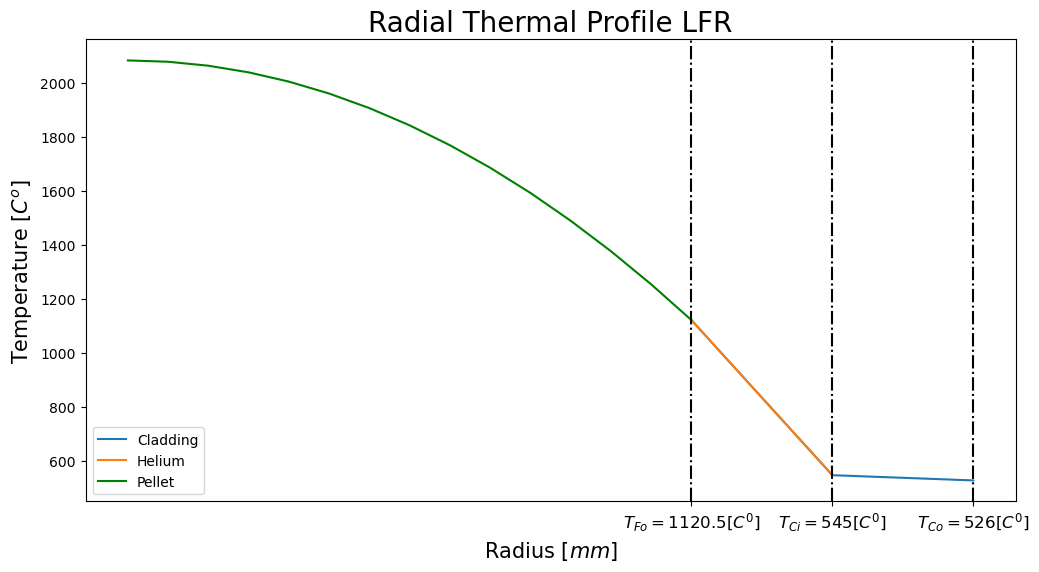

In [7]:
plt.figure(figsize=(12,6))
plt.plot([6,5,4],[Tco,Tci,TFo],label='Cladding')  #i valori delle x sono espressi in mm, e sono abbastanza accurati
plt.plot([5,4],[Tci,TFo],label='Helium')
plt.plot(r,Tfuel,color='green',label='Pellet')
plt.axvline(5,color='black',ls='-.')
plt.axvline(4,color='black',ls='-.')
plt.axvline(6,color='black',ls='-.')
plt.title(r'Radial Thermal Profile LFR',size=20)
plt.xlabel('Radius $[mm]$',size=15)
plt.ylabel('Temperature $[C^{o}]$',size=15)
plt.legend()

labelx = ['$T_{Fo}=1120.5[C^0]$',r'$T_{Ci}=545[C^0]$',r'$T_{Co}=526[C^0]$']
x=[4,5,6]               #punti in cui posizionare le nomenclature di "labelx"
plt.xticks(x, labelx,size=12)
plt.savefig('LFR-Thermal.pdf')